In [ ]:
!pip install selenium
from selenium.webdriver.common.by import By
from selenium import webdriver
!apt-get update
!apt-get install chromium-driver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 8.5 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [ ]:
url = 'https://www.ulta.com/shop/makeup/face'
driver = web_driver()
driver.get(url)

In [ ]:
driver.page_source

'<html lang="en-US" data-whatinput="initial" data-whatintent="initial" data-whatelement="a" data-whatclasses="ot-cookie-policy-link"><head>\n      <meta charset="utf-8">\n      <meta name="google-site-verification" content="0iJgVZRwJEqcwh-DfHO3TnKtFasUWdJmJbVBo2j8eg0">\n      <meta name="viewport" content="width=device-width,initial-scale=1">\n      <meta name="theme-color" content="#e90b5a">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge">\n      <link rel="manifest" href="https://www.ulta.com/google-manifest.json">\n<meta name="apple-itunes-app" content="app-id=561930308">\n      <meta data-react-helmet="true" name="description" content="Shop Face at Ulta Beauty. Free Shipping Offers &amp; Free Store Pickup Available Same Day. Join Ulta Beauty Rewards To Earn Points."><meta data-react-helmet="true" name="robots" content="index, follow,"><meta data-react-helmet="true" property="og:title" content="Face - Makeup | Ulta Beauty"><meta data-react-helmet="true" property="og:desc

In [ ]:
containers = driver.find_elements(By.CLASS_NAME, 'CategoryNav__list')


In [ ]:
print(containers)

[<selenium.webdriver.remote.webelement.WebElement (session="8592cd861bda1252e62f2362e88cfe9c", element="f.7E2513D7339AC030EE9A24498733C003.d.1ACB2473532EDBD730A9EDA59063A6BF.e.40")>]


In [ ]:
if containers:
    category_container = containers[0]  # Selecting the first container

    # Now find all category items within this container
    categories = category_container.find_elements(By.TAG_NAME, 'li')

    for category in categories:
        category_text = category.text  # Get category name
        print(f"Category: {category_text}")

        try:
            category_link = category.find_element(By.TAG_NAME, 'a').get_attribute('href')  # Get link
            print(f"Link: {category_link}")
        except:
            print("No link found for this category")
else:
    print("No category containers found")


Category: Foundation
Link: https://www.ulta.com/shop/makeup/face/foundation
Category: BB & CC Creams
Link: https://www.ulta.com/shop/makeup/face/bb-cc-creams
Category: Tinted Moisturizer
Link: https://www.ulta.com/shop/skin-care/moisturizers/tinted-moisturizer
Category: Concealer
Link: https://www.ulta.com/shop/makeup/face/concealer
Category: Face Primer
Link: https://www.ulta.com/shop/makeup/face/face-primer
Category: Blush
Link: https://www.ulta.com/shop/makeup/face/blush
Category: Bronzer
Link: https://www.ulta.com/shop/makeup/face/bronzer
Category: Highlighter
Link: https://www.ulta.com/shop/makeup/face/highlighter
Category: Contouring
Link: https://www.ulta.com/shop/makeup/face/contouring
Category: Color Correcting
Link: https://www.ulta.com/shop/makeup/face/color-correcting
Category: Setting Spray & Powder
Link: https://www.ulta.com/shop/makeup/face/setting-spray-powder
Category: Makeup Remover
Link: https://www.ulta.com/shop/skin-care/cleansers/makeup-remover


In [ ]:
driver.get('https://www.ulta.com/shop/makeup/face/foundation?page=2')
containers = driver.find_elements(By.CLASS_NAME, 'ProductListingWrapper_productList')


In [ ]:
print(containers)

[]


In [ ]:
import time
all_containers = []

Below is the code to scrape all the pages of products without loading it.
And I made a data frame

In [ ]:
import pandas as pd

#Web Scraping

## Foundation:

In [ ]:
# List to store all product data
foundation_data = []

# Loop through all pages
for page in range(1, 5):
    url = f'https://www.ulta.com/shop/makeup/face/foundation?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)  # Adjust sleep time if needed

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        foundation_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")



Page 1 scraped, found 64 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 76 products.
Page 4 scraped, found 9 products.


## BB & CC cream:

In [ ]:
# List to store all product data
creams_data = []

url = 'https://www.ulta.com/shop/makeup/face/bb-cc-creams'
driver.get(url)


# Find all product cards on the current page
product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

# Loop through each product and extract details
for product in product_cards:
    try:
        brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
    except:
        brand = "N/A"

    try:
        product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
    except:
        product_name = "N/A"

    try:
         price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
    except:
         price = "N/A"

    try:
         rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
    except:
         rating = "N/A"
# Append the product details to the list
    creams_data.append({
        "Brand": brand,
        "Product Name": product_name,
        "Price": price,
         "Rating": rating
    })
print(f"Page scraped, found {len(product_cards)} products.")

Page scraped, found 43 products.


## Tinted-moisturizer:

In [ ]:
# List to store all product data
moisturizer_data = []

url = 'https://www.ulta.com/shop/skin-care/moisturizers/tinted-moisturizer'
driver.get(url)


# Find all product cards on the current page
product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

# Loop through each product and extract details
for product in product_cards:
    try:
        brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
    except:
        brand = "N/A"

    try:
        product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
    except:
        product_name = "N/A"

    try:
         price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
    except:
         price = "N/A"

    try:
         rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
    except:
         rating = "N/A"
# Append the product details to the list
    moisturizer_data.append({
        "Brand": brand,
        "Product Name": product_name,
        "Price": price,
         "Rating": rating
    })
print(f"Page scraped, found {len(product_cards)} products.")

Page scraped, found 57 products.


## Concealer:

In [ ]:
# List to store all product data
concealer_data = []

# Loop through all pages
for page in range(1, 4):
    url = f'https://www.ulta.com/shop/makeup/face/concealer?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)  # Adjust sleep time if needed

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        concealer_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")


Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 25 products.


## Face-Primer:

In [ ]:
# List to store all product data
primer_data = []

# Loop through all pages
for page in range(1, 5):
    url = f'https://www.ulta.com/shop/makeup/face/face-primer?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        primer_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")

Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 76 products.
Page 4 scraped, found 70 products.


## Blush:

In [ ]:
# List to store all product data
blush_data = []

# Loop through all pages
for page in range(1, 6):
    url = f'https://www.ulta.com/shop/makeup/face/blush?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        blush_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")

Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 76 products.
Page 4 scraped, found 76 products.
Page 5 scraped, found 34 products.


## Bronzer

In [ ]:
# List to store all product data
bronzer_data = []

# Loop through all pages
for page in range(1, 4):
    url = f'https://www.ulta.com/shop/makeup/face/bronzer?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        bronzer_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")

Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 31 products.


## Highlighter

In [ ]:
# List to store all product data
highlighter_data = []

# Loop through all pages
for page in range(1, 5):
    url = f'https://www.ulta.com/shop/makeup/face/highlighter?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        highlighter_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")

Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 76 products.
Page 4 scraped, found 15 products.


## Contouring

In [ ]:
# List to store all product data
contouring_data = []

url = 'https://www.ulta.com/shop/makeup/face/contouring'
driver.get(url)


# Find all product cards on the current page
product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

# Loop through each product and extract details
for product in product_cards:
    try:
        brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
    except:
        brand = "N/A"

    try:
        product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
    except:
        product_name = "N/A"

    try:
         price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
    except:
         price = "N/A"

    try:
         rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
    except:
         rating = "N/A"
# Append the product details to the list
    contouring_data.append({
        "Brand": brand,
        "Product Name": product_name,
        "Price": price,
         "Rating": rating
    })
print(f"Page scraped, found {len(product_cards)} products.")

Page scraped, found 64 products.


## Color-correcting

In [ ]:
# List to store all product data
color_data = []

url = 'https://www.ulta.com/shop/makeup/face/color-correcting'
driver.get(url)


# Find all product cards on the current page
product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

# Loop through each product and extract details
for product in product_cards:
    try:
        brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
    except:
        brand = "N/A"

    try:
        product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
    except:
        product_name = "N/A"

    try:
         price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
    except:
         price = "N/A"

    try:
         rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
    except:
         rating = "N/A"
# Append the product details to the list
    color_data.append({
        "Brand": brand,
        "Product Name": product_name,
        "Price": price,
         "Rating": rating
    })
print(f"Page scraped, found {len(product_cards)} products.")

Page scraped, found 46 products.


## Setting-spray-powder

In [ ]:
# List to store all product data
setting_data = []

# Loop through all pages
for page in range(1, 5):
    url = f'https://www.ulta.com/shop/makeup/face/setting-spray-powder?page={page}'
    driver.get(url)

    # Allow some time for the page to load
    time.sleep(2)

    # Find all product cards on the current page
    product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

    # Loop through each product and extract details
    for product in product_cards:
        try:
            brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
        except:
            brand = "N/A"

        try:
            product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
        except:
            product_name = "N/A"

        try:
            price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
        except:
            price = "N/A"

        try:
            rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
        except:
            rating = "N/A"

        # Append the product details to the list
        setting_data.append({
            "Brand": brand,
            "Product Name": product_name,
            "Price": price,
            "Rating": rating
        })

    print(f"Page {page} scraped, found {len(product_cards)} products.")

Page 1 scraped, found 76 products.
Page 2 scraped, found 76 products.
Page 3 scraped, found 76 products.
Page 4 scraped, found 59 products.


## Makeup Remover:

In [ ]:
# List to store all product data
remover_data = []

url = 'https://www.ulta.com/shop/skin-care/cleansers/makeup-remover'
driver.get(url)


# Find all product cards on the current page
product_cards = driver.find_elements(By.CLASS_NAME, 'ProductCard')

# Loop through each product and extract details
for product in product_cards:
    try:
        brand = product.find_element(By.CLASS_NAME, 'ProductCard__brand').text
    except:
        brand = "N/A"

    try:
        product_name = product.find_element(By.CLASS_NAME, 'ProductCard__product').text
    except:
        product_name = "N/A"

    try:
         price = product.find_element(By.CLASS_NAME, 'ProductCard__price').text
    except:
         price = "N/A"

    try:
         rating = product.find_element(By.CLASS_NAME, 'ProductCard__rating').text
    except:
         rating = "N/A"
# Append the product details to the list
    remover_data.append({
        "Brand": brand,
        "Product Name": product_name,
        "Price": price,
         "Rating": rating
    })
print(f"Page scraped, found {len(product_cards)} products.")

Page scraped, found 69 products.


In [ ]:
# Close the driver when done
driver.quit()

#Creating a df of each category

In [ ]:
foundation_df = pd.DataFrame(foundation_data)
foundation_df = foundation_df[~foundation_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
foundation_df = foundation_df.reset_index(drop=True)
foundation_df = foundation_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
foundation_df[['Stars', 'Reviews']] = foundation_df['Rating'].str.split(' ; ', expand=True)
foundation_df['Stars'] = foundation_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
foundation_df['Reviews'] = foundation_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
foundation_df = foundation_df.drop(columns=['Rating'])
foundation_df['Category'] = "Foundation"
foundation_df

<ipython-input-25-fc61dbc28bc2>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  foundation_df = foundation_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand                                       Product Name  \
0             IT Cosmetics                             CC+ Cream with SPF 50+   
1    Urban Decay Cosmetics       Face Bond Self-Setting Waterproof Foundation   
2             Estée Lauder               Double Wear Stay-in-Place Foundation   
3                 Clinique  Even Better Clinical Serum Foundation Broad Sp...   
4                  Lancôme  Teint Idole Ultra Wear 24H Full Coverage Found...   
..                     ...                                                ...   
202              HOURGLASS                      Illusion Hyaluronic Skin Tint   
203            KIKO Milano              Nothing Matte-R Mattifying Foundation   
204           jane iredale                                 Refillable Compact   
205           Estée Lauder  Double Wear Maximum Cover Camouflage Foundatio...   
206                   NARS                                    Foundation Pump   

                                              Price Stars Reviews    Category  
0                                            $47.00   4.3   22287  Foundation  
1    sale price $20.00$20.00list price $40.00$40.00   4.4    1941  Foundation  
2                                            $52.00   4.6   10951  Foundation  
3                                            $48.00   4.2    4330  Foundation  
4                                            $53.00   4.5   10595  Foundation  
..                                              ...   ...     ...         ...  
202                                          $56.00   3.8      12  Foundation  
203                                          $16.50   3.9      10  Foundation  
204                                          $20.00   4.6     191  Foundation  
205                                          $55.00   4.3    1013  Foundation  
206                                           $6.00   2.8      98  Foundation  

[207 rows x 6 columns]

In [ ]:
creams_df = pd.DataFrame(creams_data)
creams_df = creams_df[~creams_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
creams_df = creams_df.reset_index(drop=True)
creams_df = creams_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
creams_df[['Stars', 'Reviews']] = creams_df['Rating'].str.split(' ; ', expand=True)
creams_df['Stars'] = creams_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
creams_df['Reviews'] = creams_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
creams_df = creams_df.drop(columns=['Rating'])
creams_df['Category'] = "BB and CC Creams"
creams_df

<ipython-input-26-75a792ff7bed>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  creams_df = creams_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0              IT Cosmetics   
1              IT Cosmetics   
2   Anastasia Beverly Hills   
3              IT Cosmetics   
4   Anastasia Beverly Hills   
5              IT Cosmetics   
6              Juice Beauty   
7              IT Cosmetics   
8              IT Cosmetics   
9                  Clinique   
10             IT Cosmetics   
11         e.l.f. Cosmetics   
12                     TULA   
13               Maybelline   
14               Dermablend   
15         e.l.f. Cosmetics   
16              BOBBI BROWN   
17                    Tarte   
18                  L'Oréal   
19                  L'Oréal   
20                CoverGirl   
21                  L'Oréal   
22                 Pacifica   
23              KIKO Milano   
24             jane iredale   
25                Hey Honey   
26                 Erborian   
27                 Erborian   
28                 Erborian   
29                 Erborian   
30                 Erborian   
31                 Erborian   
32                 Erborian   
33                 Erborian   

                                         Product Name  \
0                              CC+ Cream with SPF 50+   
1   CC+ Nude Glow Lightweight Foundation + Glow Se...   
2                 Beauty Balm Serum Boosted Skin Tint   
3                              CC+ Cream with SPF 50+   
4                 Beauty Balm Serum Boosted Skin Tint   
5   CC+ Nude Glow Lightweight Foundation + Glow Se...   
6                       STEM CELLULAR CC Cream SPF 30   
7                      CC+ Cream Illumination SPF 50+   
8      CC+ Cream Natural Matte Foundation with SPF 40   
9   Moisture Surge CC Cream Hydrating Colour Corre...   
10                        Mini CC+ Cream with SPF 50+   
11                     Camo Hydrating CC Cream SPF 30   
12    Radiant Skin Brightening Serum Skin Tint SPF 30   
13         Dream Fresh BB Cream 8-In-1 Skin Perfector   
14  Continuous Correction Tone-Evening CC Cream SP...   
15                                      Camo CC Cream   
16        Vitamin Enriched Hydrating Skin Tint SPF 15   
17  BB Blur Tinted Moisturizer Broad Spectrum SPF ...   
18    Studio Secrets Magic Skin Beautifier B.B. Cream   
19        Magic Skin Beautifier BB Cream Anti-Redness   
20                               Clean Matte BB Cream   
21        Magic Skin Beautifier BB Cream Anti-Fatigue   
22                      Alight Multi-Mineral BB Cream   
23                               Skin Trainer CC Blur   
24                             Glow Time Pro BB Cream   
25  Trick and Treat CC² Active Propolis Color Corr...   
26                                    CC Cream SPF 25   
27         CC Red Correct Green Color Corrector SPF25   
28                                    BB Cream SPF 20   
29                        Travel Size CC Cream SPF 25   
30                        Travel Size BB Cream SPF 20   
31                      CC Water with Hyaluronic Acid   
32          Travel Size CC Water with Hyaluronic Acid   
33  Travel Size CC Red Correct Green Color Correct...   

                                             Price Stars Reviews  \
0                                           $47.00   4.3  22,287   
1                                           $47.00   4.4   3,955   
2                                           $42.00   4.2     884   
3                                           $47.00   4.3   22287   
4                                           $42.00   4.2     884   
5                                           $47.00   4.4    3955   
6                                           $39.50     4    1888   
7                                           $47.00   4.3    7047   
8                                           $47.00   4.4    4131   
9                                           $44.00   4.2    1165   
10                                          $22.00   4.3   22278   
11                                          $15.00   4.4    2152   
12                                          $42.00   4.2

In [ ]:
moisturizer_df = pd.DataFrame(moisturizer_data)
moisturizer_df = moisturizer_df[~moisturizer_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
moisturizer_df = moisturizer_df.reset_index(drop=True)
moisturizer_df = moisturizer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
moisturizer_df[['Stars', 'Reviews']] = moisturizer_df['Rating'].str.split(' ; ', expand=True)
moisturizer_df['Stars'] = moisturizer_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
moisturizer_df['Reviews'] = moisturizer_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
moisturizer_df = moisturizer_df.drop(columns=['Rating'])
moisturizer_df['Category'] = "Tinted Moisturizers"
moisturizer_df

<ipython-input-27-538142b7d263>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  moisturizer_df = moisturizer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0               Live Tinted   
1              bareMinerals   
2                  Clinique   
3              bareMinerals   
4             Laura Mercier   
5                  Clinique   
6               MILK MAKEUP   
7               Live Tinted   
8              bareMinerals   
9                      NARS   
10  Anastasia Beverly Hills   
11                      MAC   
12                  Lancôme   
13                     TULA   
14    Urban Decay Cosmetics   
15                      PÜR   
16            Laura Mercier   
17                 Smashbox   
18            Laura Mercier   
19   ULTA Beauty Collection   
20               RMS Beauty   
21                 Naturium   
22           La Roche-Posay   
23                ColourPop   
24                    Tarte   
25              BOBBI BROWN   
26                 Smashbox   
27        Peter Thomas Roth   
28                    COOLA   
29               WYN BEAUTY   
30               RMS Beauty   
31                   ELEMIS   
32                    Avène   
33             Beekman 1802   
34                    Hempz   
35                 NUDESTIX   
36                 Pacifica   
37                    Tarte   
38          Kate Somerville   
39             jane iredale   
40                    Tarte   
41            Naked Sundays   
42             jane iredale   
43            Beautycounter   
44               Wet n Wild   
45            Honest Beauty   
46                HOURGLASS   
47                    Tarte   

                                         Product Name  \
0   Hueguard Skin Tint SPF 50 Mineral Sunscreen Br...   
1   COMPLEXION RESCUE Tinted Moisturizer with Hyal...   
2   Moisture Surge Sheertint Hydrator Broad Spectr...   
3   COMPLEXION RESCUE Tinted Moisturizer with Hyal...   
4   Long-Wear Tinted Moisturizer Natural Dewy SPF ...   
5   Moisture Surge Sheertint Hydrator Broad Spectr...   
6          Hydro Grip 12-Hour Hydrating Gel Skin Tint   
7   Hueguard Skin Tint SPF 50 Mineral Sunscreen Br...   
8   COMPLEXION RESCUE Natural Matte Tinted Moistur...   
9              Pure Radiant Tinted Moisturizer SPF 30   
10                Beauty Balm Serum Boosted Skin Tint   
11                              Strobe Dewy Skin Tint   
12  Skin Feels Good Hydrating Tinted Moisturizer w...   
13    Radiant Skin Brightening Serum Skin Tint SPF 30   
14              Hydromaniac Hydrating Dewy Foundation   
15    4-in-1 Tinted Moisturizer Broad Spectrum SPF 20   
16  Tinted Moisturizer Light Revealer Natural Skin...   
17  Halo Healthy Glow Tinted Moisturizer Broad Spe...   
18   Tinted Moisturizer Oil Free Blurred Matte SPF 30   
19                          Tinted Moisturizer SPF 24   
20  SunCoverup Super Tint Broad Spectrum SPF 50 Su...   
21                Dew-Glow Tinted Moisturizer SPF 50+   
22  Anthelios Mineral Tinted Fluid Face Sunscreen ...   
23    Pretty Fresh Hyaluronic Acid Tinted Moisturizer   
24      Skin Treat Poreless Tinted Moisturizer SPF 20   
25        Vitamin Enriched Hydrating Skin Tint SPF 15   
26  Mini Halo Healthy Glow Tinted Moisturizer Broa...   
27  Water Drench Broad Spectrum SPF 45 Hyaluronic ...   
28  Rosilliance Tinted Moisturizer Organic Sunscre...   
29  Featuring You Hydrating Skin Enhancing Tint SP...   
30  SuperNatural Radiance Serum Broad Spectrum SPF...   
31                 Superfood Glow Priming Moisturiser   
32  Mineral Sunscreen Multi-Defense Fluid Tinted S...   
33               Milk Tint SPF 43 Tinted Primer Serum   
34                            Star Dust Shimmer Stick   
35               NUDESCREEN Daily Mineral Veil SPF 30   
36                             Kind Tint Tinted Serum   
37  Travel Size BB Blur Tinted Moisturizer Broad S...   
38               HydraKate Illuminating SPF 50+ Drops   
39                      Dream Tint Tinted Moisturizer   
40                  Maracuja Vegan Tinted Moisturizer   
41         BeautyScreen Peptide Foundation Tint SPF50   
42                             HydroPure Tinted Ser

In [ ]:
concealer_df = pd.DataFrame(concealer_data)
concealer_df = concealer_df[~concealer_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
concealer_df = concealer_df.reset_index(drop=True)
concealer_df = concealer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
concealer_df[['Stars', 'Reviews']] = concealer_df['Rating'].str.split(' ; ', expand=True)
concealer_df['Stars'] = concealer_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
concealer_df['Reviews'] = concealer_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
concealer_df = concealer_df.drop(columns=['Rating'])
concealer_df['Category'] = "Concealer"
concealer_df

<ipython-input-28-4ed6fbe3161f>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  concealer_df = concealer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand                                       Product Name  \
0        HOURGLASS                          Vanish Airbrush Concealer   
1            Tarte                    Shape Tape Blur Concealer Stick   
2             NARS                           Radiant Creamy Concealer   
3             NARS                           Radiant Creamy Concealer   
4     Estée Lauder        Double Wear Stay-in-Place 24-Hour Concealer   
..             ...                                                ...   
145    KIKO Milano                            Full Coverage Concealer   
146      Hey Honey                              Trick&Treat Concealer   
147        Lancôme  Effacernes Waterproof Protective Undereye Conc...   
148  Undone Beauty          Conceal To Reveal 3-in-1 Coverage Palette   
149   jane iredale                         PureMatch Liquid Concealer   

                                            Price Stars Reviews   Category  
0                                          $38.00   4.1     416  Concealer  
1                                          $29.00   3.3      35  Concealer  
2                                          $32.00   4.6   6,604  Concealer  
3                                          $32.00   4.6    6604  Concealer  
4                                          $38.00   4.8     479  Concealer  
..                                            ...   ...     ...        ...  
145  sale price $6.75$6.75list price $13.50$13.50   3.3      13  Concealer  
146                                        $38.00   4.6     270  Concealer  
147                                        $34.00   4.6     946  Concealer  
148                                        $14.00   4.4     296  Concealer  
149                                        $30.00   4.6     258  Concealer  

[150 rows x 6 columns]

In [ ]:
primer_df = pd.DataFrame(primer_data)
primer_df = primer_df[~primer_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
primer_df = primer_df.reset_index(drop=True)
primer_df = primer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
primer_df[['Stars', 'Reviews']] = primer_df['Rating'].str.split(' ; ', expand=True)
primer_df['Stars'] = primer_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
primer_df['Reviews'] = primer_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
primer_df = primer_df.drop(columns=['Rating'])
primer_df['Category'] = "Primer"
primer_df

<ipython-input-29-99b24690aa3a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  primer_df = primer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand                                       Product Name  \
0     e.l.f. Cosmetics                                  Power Grip Primer   
1    Benefit Cosmetics           The POREfessional Pore Minimizing Primer   
2              Lancôme     UV Expert Defense SPF 50+ Primer & Moisturizer   
3     e.l.f. Cosmetics                                  Power Grip Primer   
4             Smashbox  The Original Photo Finish Smooth & Blur Oil-Fr...   
..                 ...                                                ...   
257              LORAC                         PRO Skin Glass Skin Primer   
258            Lancôme  Priming Serum 24H Hydrating Solid Smoothing Pr...   
259  Charlotte Tilbury                 Travel Size Wonderglow Face Primer   
260           Erborian  Travel Size Matte Cream Mattifying & Blurring ...   
261              LORAC            Light Source 3-in-1 Illuminating Primer   

               Price Stars Reviews Category  
0             $10.00   4.6  15,704   Primer  
1    $35.00 - $58.00   4.4   8,322   Primer  
2    $48.00 - $60.00   4.5     901   Primer  
3             $10.00   4.6   15704   Primer  
4    $34.00 - $55.00   4.6    5481   Primer  
..               ...   ...     ...      ...  
257           $35.00   4.7      45   Primer  
258           $46.00   4.7     627   Primer  
259           $25.00     5       1   Primer  
260           $20.50   4.3      34   Primer  
261           $35.00   4.6     144   Primer  

[262 rows x 6 columns]

In [ ]:
blush_df = pd.DataFrame(blush_data)
blush_df = blush_df[~blush_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
blush_df = blush_df.reset_index(drop=True)
blush_df = blush_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
blush_df[['Stars', 'Reviews']] = blush_df['Rating'].str.split(' ; ', expand=True)
blush_df['Stars'] = blush_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
blush_df['Reviews'] = blush_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
blush_df = blush_df.drop(columns=['Rating'])
blush_df['Category'] = "Blush"
blush_df

<ipython-input-30-1e8fd4b02e67>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blush_df = blush_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand                                Product Name  \
0         bareMinerals            GEN NUDE BLONZER Blush + Bronzer   
1                 NARS                      Afterglow Liquid Blush   
2    Benefit Cosmetics           Benetint Liquid Lip & Cheek Stain   
3    Benefit Cosmetics           Benetint Liquid Lip & Cheek Stain   
4           Youthforia          BYO BLUSH Color Changing Blush Oil   
..                 ...                                         ...   
288  Revolution Beauty                          Blush Icon Palette   
289            Essence          Love It A Choco' Lot! Blush Mousse   
290         Wet n Wild                        Megaglo Makeup Stick   
291          HOURGLASS               Ambient Strobe Lighting Blush   
292                MAC  Effervescence Extra Dimension Face Compact   

               Price Stars Reviews Category  
0             $29.00   4.7     568    Blush  
1             $32.00   4.7   1,095    Blush  
2             $26.00   4.1   2,199    Blush  
3             $26.00   4.1    2199    Blush  
4             $36.00   4.5     209    Blush  
..               ...   ...     ...      ...  
288           $12.00   N/A     NaN    Blush  
289            $4.99     5       1    Blush  
290            $4.49     4     280    Blush  
291           $46.00   4.4       7    Blush  
292  $30.80 - $44.00     1       1    Blush  

[293 rows x 6 columns]

In [ ]:
bronzer_df = pd.DataFrame(bronzer_data)
bronzer_df = bronzer_df[~bronzer_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
bronzer_df = bronzer_df.reset_index(drop=True)
bronzer_df = bronzer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
bronzer_df[['Stars', 'Reviews']] = bronzer_df['Rating'].str.split(' ; ', expand=True)
bronzer_df['Stars'] = bronzer_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
bronzer_df['Reviews'] = bronzer_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
bronzer_df = bronzer_df.drop(columns=['Rating'])
bronzer_df['Category'] = "Bronzer"
bronzer_df

<ipython-input-31-196acd6237e1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bronzer_df = bronzer_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0               bareMinerals   
1                DIBS Beauty   
2          Benefit Cosmetics   
3                DIBS Beauty   
4    NYX Professional Makeup   
..                       ...   
151             J.Cat Beauty   
152                    LORAC   
153                    Tarte   
154          KYLIE COSMETICS   
155                      MAC   

                                         Product Name            Price Stars  \
0                    GEN NUDE BLONZER Blush + Bronzer           $29.00   4.7   
1             Desert Island Duo Blush + Bronzer Stick           $36.00   4.7   
2                          Hoola Matte Powder Bronzer           $36.00   4.5   
3             Desert Island Duo Blush + Bronzer Stick           $36.00   4.7   
4    Buttermelt Pressed Powder Natural Finish Bronzer           $10.00   4.3   
..                                                ...              ...   ...   
151                       Golden Soleil Baked Bronzer            $8.99   3.7   
152              TANtalizer Buildable Bronzing Powder           $32.00   4.5   
153                 Amazonian Clay Waterproof Bronzer           $32.00   4.6   
154                           Pressed Bronzing Powder           $22.00   4.3   
155        Effervescence Extra Dimension Face Compact  $30.80 - $44.00     1   

    Reviews Category  
0       568  Bronzer  
1     4,633  Bronzer  
2     3,233  Bronzer  
3      4633  Bronzer  
4       721  Bronzer  
..      ...      ...  
151      27  Bronzer  
152     129  Bronzer  
153     328  Bronzer  
154     704  Bronzer  
155       1  Bronzer  

[156 rows x 6 columns]

In [ ]:
highlighter_df = pd.DataFrame(highlighter_data)
highlighter_df = highlighter_df[~highlighter_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
highlighter_df = highlighter_df.reset_index(drop=True)
highlighter_df = highlighter_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
highlighter_df[['Stars', 'Reviews']] = highlighter_df['Rating'].str.split(' ; ', expand=True)
highlighter_df['Stars'] = highlighter_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
highlighter_df['Reviews'] = highlighter_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
highlighter_df = highlighter_df.drop(columns=['Rating'])
highlighter_df['Category'] = "Highlighter"
highlighter_df

<ipython-input-32-91a6ffbb394b>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  highlighter_df = highlighter_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0           e.l.f. Cosmetics   
1          Charlotte Tilbury   
2                    L'Oréal   
3           e.l.f. Cosmetics   
4    FENTY BEAUTY by Rihanna   
..                       ...   
202        Charlotte Tilbury   
203                  L'Oréal   
204                  Persona   
205                      MAC   
206          Petite n Pretty   

                                          Product Name            Price Stars  \
0                              Halo Glow Liquid Filter           $14.00   4.6   
1                            Hollywood Flawless Filter           $49.00   4.5   
2    True Match Lumi Glotion Natural Glow Bronzing ...           $16.99   4.4   
3                              Halo Glow Liquid Filter           $14.00   4.6   
4                   Diamond Bomb All-Over Diamond Veil           $43.00   4.5   
..                                                 ...              ...   ...   
202                          Hollywood Flawless Filter           $49.00   4.5   
203  True Match Lumi Glotion Natural Glow Bronzing ...           $16.99   4.4   
204                       DreamStick Cream Highlighter           $28.00   3.2   
205         Effervescence Extra Dimension Face Compact  $30.80 - $44.00     1   
206                    Born to Glow Makeup Starter Set           $36.00   4.3   

    Reviews     Category  
0     8,542  Highlighter  
1       516  Highlighter  
2     1,208  Highlighter  
3      8542  Highlighter  
4       262  Highlighter  
..      ...          ...  
202     516  Highlighter  
203   1,208  Highlighter  
204       6  Highlighter  
205       1  Highlighter  
206       4  Highlighter  

[207 rows x 6 columns]

In [ ]:
contouring_df = pd.DataFrame(contouring_data)
contouring_df = contouring_df[~contouring_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
contouring_df = contouring_df.reset_index(drop=True)
contouring_df = contouring_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
contouring_df[['Stars', 'Reviews']] = contouring_df['Rating'].str.split(' ; ', expand=True)
contouring_df['Stars'] = contouring_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
contouring_df['Reviews'] = contouring_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
contouring_df = contouring_df.drop(columns=['Rating'])
contouring_df['Category'] = "Contouring"
contouring_df

<ipython-input-33-2b1d218c4889>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contouring_df = contouring_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0                     Tarte   
1   FENTY BEAUTY by Rihanna   
2                     Tarte   
3                     Tarte   
4               MILK MAKEUP   
5   FENTY BEAUTY by Rihanna   
6                      Dior   
7                     Tarte   
8         Charlotte Tilbury   
9          e.l.f. Cosmetics   
10                 Smashbox   
11  NYX Professional Makeup   
12         e.l.f. Cosmetics   
13              DIBS Beauty   
14        Benefit Cosmetics   
15                 Smashbox   
16                 Clinique   
17                    Tarte   
18                 Smashbox   
19  Anastasia Beverly Hills   
20         e.l.f. Cosmetics   
21         e.l.f. Cosmetics   
22                HOURGLASS   
23                 NUDESTIX   
24   ULTA Beauty Collection   
25                  Essence   
26   ULTA Beauty Collection   
27               KVD Beauty   
28              DIBS Beauty   
29        Revolution Beauty   
30                CoverGirl   
31                   Milani   
32               KVD Beauty   
33                L.A. Girl   
34        Revolution Beauty   
35               Wet n Wild   
36            FLOWER Beauty   
37        Revolution Beauty   
38            ICONIC LONDON   
39                 Pacifica   
40               Wet n Wild   
41                    Tarte   
42               Wet n Wild   
43              KIKO Milano   
44             J.Cat Beauty   
45                    LORAC   
46            ICONIC LONDON   
47                 NUDESTIX   
48        Revolution Beauty   
49  Anastasia Beverly Hills   
50  NYX Professional Makeup   
51                    LORAC   
52             J.Cat Beauty   
53               Wet n Wild   
54                    LORAC   

                                         Product Name  \
0                                Shape Tape Concealer   
1                        Match Stix Contour Skinstick   
2                                 Sculpt Tape Contour   
3                                Shape Tape Concealer   
4                          Sculpt Stick Cream Contour   
5                        Match Stix Contour Skinstick   
6                          Forever Skin Contour Stick   
7                                 Sculpt Tape Contour   
8                              Hollywood Contour Wand   
9                       Camo Liquid Bronzer & Contour   
10  Cali Contour Blush, Highlighter, & Bronzer Fac...   
11       Wonder Stick Cream Highlight & Contour Stick   
12                      Halo Glow Contour Beauty Wand   
13      GlowTour Duo Shimmering Blush + Contour Stick   
14  Boi-ing Cakeless Full Coverage Waterproof Liqu...   
15  Step-By-Step Contour Highlighter & Bronzer Fac...   
16                     Chubby Stick Sculpting Contour   
17            Shape Tape Glow Wand Liquid Highlighter   
18     Halo Sculpt + Glow Face Palette With Vitamin E   
19             Matte Cream Contour & Highlight Sticks   
20                                    Contour Palette   
21                              Cream Contour Palette   
22                 Ambient Lighting Palette Volume II   
23                  Nudies All Over Face Color - Glow   
24                                        Contour Kit   
25                               Contouring Duo Stick   
26          Pillow Puff Bronzing & Contour Cream Wand   
27      Shade + Light Refillable Face Contour Palette   
28              GlowTour Duo pH Blush + Contour Stick   
29                              Ultra Contour Palette   
30          Trublend Skin Enhancer Balm Contour Stick   
31  Conceal & Perfect Face Lift Collection Liquid ...   
32                          ModCon Liquid-Gel Contour   
33                          Glow Envy Contouring Wand   
34           Conceal & Define Full Coverage Concealer   
35                   MegaGlo Dual-Ended Contour Stick   
36                            Lowlight Liquid Contour   
37                            Fast Base Contour Stick   
38                      Shape & Shade Sculpting Stick   
39   

In [ ]:
color_df = pd.DataFrame(color_data)
color_df = color_df[~color_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
color_df = color_df.reset_index(drop=True)
color_df = color_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
color_df[['Stars', 'Reviews']] = color_df['Rating'].str.split(' ; ', expand=True)
color_df['Stars'] = color_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
color_df['Reviews'] = color_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
color_df = color_df.drop(columns=['Rating'])
color_df['Category'] = "Color Correcting"
color_df

<ipython-input-34-8a8d68f804ee>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_df = color_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0              IT Cosmetics   
1                     Tarte   
2   NYX Professional Makeup   
3              IT Cosmetics   
4               BOBBI BROWN   
5                     Tarte   
6                  Smashbox   
7   NYX Professional Makeup   
8                 L.A. Girl   
9                  Clinique   
10                    Stila   
11         e.l.f. Cosmetics   
12                L.A. Girl   
13                    Tarte   
14             IT Cosmetics   
15              BOBBI BROWN   
16                 Clinique   
17                     NARS   
18  NYX Professional Makeup   
19   ULTA Beauty Collection   
20              Live Tinted   
21             OLEHENRIKSEN   
22                   Milani   
23                 Clinique   
24        Revolution Beauty   
25                HOURGLASS   
26                  Essence   
27  NYX Professional Makeup   
28                   Milani   
29                Winky Lux   
30           NATASHA DENONA   
31            FLOWER Beauty   
32                    Tarte   
33             jane iredale   
34             J.Cat Beauty   
35        Charlotte Tilbury   
36                 Erborian   

                                         Product Name            Price Stars  \
0                              CC+ Cream with SPF 50+           $47.00   4.3   
1                                Shape Tape Corrector           $32.00   4.3   
2           Pro Fix Stick Color Correcting Concealers            $9.00   4.4   
3                              CC+ Cream with SPF 50+           $47.00   4.3   
4                          Skin Color Corrector Stick           $35.00   4.6   
5                                Shape Tape Corrector           $32.00   4.3   
6    Smashbox X BECCA Under Eye Brightening Corrector           $33.00   4.3   
7           Pro Fix Stick Color Correcting Concealers            $9.00   4.4   
8                 Lightweight HD Pro Creamy Concealer    $5.49 - $5.50     4   
9   Redness Solutions Makeup Broad Spectrum SPF 15...           $40.00   4.5   
10  Correct and Perfect All-In-One Color Correctin...           $45.00   4.6   
11                               Camo Color Corrector            $4.00     4   
12                         HD Pro Corrector Concealer    $5.49 - $5.50     4   
13                      Maracuja Creaseless Corrector           $30.00   3.5   
14  Bye Bye Redness Neutralizing Color-Correcting ...           $38.00   4.4   
15                   Waterproof Color Corrector Cream  $33.00 - $35.00   4.6   
16    Even Better All-Over Primer and Color Corrector           $32.00   3.2   
17                    Light Reflecting Eye Brightener           $34.00   4.6   
18              3C Color Correcting Concealer Palette           $12.00     4   
19                  Color Correcting Liquid Concealer           $12.00   4.2   
20                           Huestick Color Corrector           $26.00   4.6   
21   Banana Bright Vitamin CC Sticks for Dark Circles           $35.00   4.5   
22             Supercharged Brightening Undereye Tint           $10.99   4.3   
23  Redness Solutions Instant Relief Mineral Press...           $42.00   3.9   
24          Revolution Eye Bright Under Eye Corrector            $8.00   4.4   
25              Ambient Lighting Palette - Volume lll           $73.00   4.9   
26           Correct & Conceal Anti Redness Concealer            $4.99   N/A   
27    Studio Perfect Color Correcting Primer in Green           $14.00   3.8   
28  Conceal & Perfect Face Lift Collection Underey...           $10.99   4.4   
29                     Peeper Correct Color Corrector           $14.00   4.3   
30                       Hy-Glam Correcting Concealer           $30.00   4.7   
31                    Bright Eyed Under Eye Corrector           $13.00   4.5   
32                   Travel-Size Shape Tape Corrector           $15.00   2.5   
33  HydroPure Color Correcting Serum with Hyaluron...           $58.00   3.6   
34              Color Corrector Quad Spectr

In [ ]:
setting_df = pd.DataFrame(setting_data)
setting_df = setting_df[~setting_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
setting_df = setting_df.reset_index(drop=True)

setting_df = setting_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
setting_df[['Stars', 'Reviews']] = setting_df['Rating'].str.split(' ; ', expand=True)
setting_df['Stars'] = setting_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
setting_df['Reviews'] = setting_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
setting_df = setting_df.drop(columns=['Rating'])
setting_df['Category'] = "Setting Spray and Powder"
setting_df

<ipython-input-35-48a1d31feee7>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  setting_df = setting_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand  \
0      Urban Decay Cosmetics   
1                     Morphe   
2          Charlotte Tilbury   
3      Urban Decay Cosmetics   
4                     Milani   
..                       ...   
246            Kopari Beauty   
247               Wet n Wild   
248  NYX Professional Makeup   
249               Wet n Wild   
250                    Tarte   

                                          Product Name            Price Stars  \
0          All Nighter Waterproof Makeup Setting Spray           $36.00   4.7   
1                            Bake & Set Setting Powder           $15.00   4.6   
2              Airbrush Flawless Finish Setting Powder           $48.00     4   
3          All Nighter Waterproof Makeup Setting Spray           $36.00   4.7   
4    Make It Last Original - Natural Finish Setting...  $10.99 - $19.99   4.5   
..                                                 ...              ...   ...   
246       Sunglaze Sheer Setting Mist Sunscreen SPF 50           $34.00   4.7   
247                   Photo Focus Loose Setting Powder            $7.99   4.5   
248   Radiant Finish Long Lasting Makeup Setting Spray           $10.00     4   
249            Photo Focus Loose Setting Powder Banana            $7.99   4.5   
250                 Travel-Size Shape Tape Glow Powder           $18.00     4   

    Reviews                  Category  
0     7,787  Setting Spray and Powder  
1     1,553  Setting Spray and Powder  
2        77  Setting Spray and Powder  
3      7787  Setting Spray and Powder  
4      1371  Setting Spray and Powder  
..      ...                       ...  
246      82  Setting Spray and Powder  
247     237  Setting Spray and Powder  
248    1250  Setting Spray and Powder  
249     982  Setting Spray and Powder  
250       4  Setting Spray and Powder  

[251 rows x 6 columns]

In [ ]:
remover_df = pd.DataFrame(remover_data)
remover_df = remover_df[~remover_df.apply(lambda x: x.str.strip().eq('').all(), axis=1)]
remover_df = remover_df.reset_index(drop=True)

remover_df = remover_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)
remover_df[['Stars', 'Reviews']] = remover_df['Rating'].str.split(' ; ', expand=True)
remover_df['Stars'] = remover_df['Stars'].str.replace(' out of 5 stars', '', regex=False)
remover_df['Reviews'] = remover_df['Reviews'].str.extract(r'(\d[\d,]*)')[0]
remover_df = remover_df.drop(columns=['Rating'])
remover_df['Category'] = "Makeup Remover"
remover_df

<ipython-input-36-c679a8ea780b>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  remover_df = remover_df.applymap(lambda x: x.strip().replace("\n", "") if isinstance(x, str) else x)


Brand                                       Product Name  \
0                 Clinique  Take The Day Off Makeup Remover For Lids, Lash...   
1                  Lancôme          Bi-Facil Double Action Eye Makeup Remover   
2                 Clinique        Travel Size Take The Day Off Makeup Remover   
3                 Clinique  Take The Day Off Makeup Remover For Lids, Lash...   
4               Neutrogena     Makeup Remover Cleansing Towelettes, Twin Pack   
5                  Lancôme          Bi-Facil Double Action Eye Makeup Remover   
6                 Clinique     Take The Day Off Cleansing Balm Makeup Remover   
7                 Clinique        Travel Size Take The Day Off Makeup Remover   
8               Neutrogena                        Oil-Free Eye Makeup Remover   
9                   CeraVe  Plant-Based Hydrating Makeup Removing Face Wip...   
10              Neutrogena  Makeup Remover Cleansing Towelettes Fragrance ...   
11                 Garnier     Makeup Removing Cleansing Balm Hyaluronic Acid   
12                Clinique               Rinse-Off Eye Makeup Remover Solvent   
13                Cetaphil  Gentle Makeup Removing Wipes, Fragrance and Al...   
14                  TATCHA  The Camellia Oil 2-in-1 Makeup Remover & Cleanser   
15                Clinique  Take The Day Off Cleansing Balm Makeup Remover...   
16            Beekman 1802  Micellar Milk Froth Cleansing Gel & Makeup Rem...   
17                 Garnier       Erase It All Makeup Cleansing Balm Vitamin C   
18                 Garnier  SkinActive Micellar Cleansing Water All-in-1 C...   
19                  TATCHA  The Indigo Cleansing Balm Moisturizing Makeup ...   
20        e.l.f. Cosmetics      Holy Hydration! Makeup Melting Cleansing Balm   
21                    Kiss           Falscara False Eyelash Rosewater Remover   
22                Clinique        Clinique Icons Skincare and Makeup Gift Set   
23              HALF MAGIC                  Flik Eraser Makeup Correcting Pen   
24                  CeraVe  Comforting Eye Makeup Remover with Hyaluronic ...   
25                 Essence       Lash Princess Waterproof Eye Make-Up Remover   
26              Neutrogena  Fragrance-Free Makeup Remover Cleansing Towele...   
27              Neutrogena                        Makeup Remover Melting Balm   
28                  Aveeno                Calm + Restore Makeup Remover Wipes   
29  ULTA Beauty Collection                Waterproof Eye & Lip Makeup Remover   
30          Good Molecules                             Instant Cleansing Balm   
31              Neutrogena    Travel Size Makeup Remover Cleansing Towelettes   
32  ULTA Beauty Collection                             Makeup Removing Towels   
33                    Kiss     Lash Purify Eye Makeup Remover & Lash Cleanser   
34              Neutrogena  Night Calming Makeup Remover Cleansing Towelet...   
35                     MAC  Mini Gently Off Wipes + Micellar Water Makeup ...   
36                     MAC              Gently Off Eye and Lip Makeup Remover   
37                    ILIA  The Cleanse Soft Foaming Cleanser + Makeup Rem...   
38                Clinique  Take The Day Off Charcoal Cleansing Balm Makeu...   
39  ULTA Beauty Collection                        Melting Balm Makeup Remover   
40                  CHANEL  DÉMAQUILLANT YEUX INTENSE Gentle Bi-Phase Eye ...   
41           Velour Lashes     Travel Size Lash Clean Oil-Free Makeup Remover   
42                 Garnier  SkinActive Micellar Cleansing Water All-in-1 W...   
43  ULTA Beauty Collection                       Whoopsie Eye Liner Corrector   
44            J.Cat Beauty                          Waterproof Makeup Remover   
45              Neutrogena         Makeup Remover Cleansing Towelette Singles   
46               Glamnetic        On-The-Go Oopsies Waterproof Makeup Remover   
47            Estée Lauder                 Take It Away Makeup Remover Lotion   
48                 L'Oréal                   100% Oi

#Cleaning the data

In [ ]:
dfs = [contouring_df, color_df, setting_df, remover_df, highlighter_df,bronzer_df, blush_df, primer_df, foundation_df, creams_df, moisturizer_df, concealer_df ]  # Add all your DataFrames here

face_df = pd.concat(dfs, ignore_index=True)
face_df['Price'] = face_df['Price'].replace({'\$': '', ',': ''}, regex=True)
face_df


Brand  \
0                       Tarte   
1     FENTY BEAUTY by Rihanna   
2                       Tarte   
3                       Tarte   
4                 MILK MAKEUP   
...                       ...   
1755              KIKO Milano   
1756                Hey Honey   
1757                  Lancôme   
1758            Undone Beauty   
1759             jane iredale   

                                           Product Name  \
0                                  Shape Tape Concealer   
1                          Match Stix Contour Skinstick   
2                                   Sculpt Tape Contour   
3                                  Shape Tape Concealer   
4                            Sculpt Stick Cream Contour   
...                                                 ...   
1755                            Full Coverage Concealer   
1756                              Trick&Treat Concealer   
1757  Effacernes Waterproof Protective Undereye Conc...   
1758          Conceal To Reveal 3-in-1 Coverage Palette   
1759                         PureMatch Liquid Concealer   

                                         Price Stars Reviews    Category  
0                                        32.00   4.7  37,768  Contouring  
1                                        32.00   4.2     540  Contouring  
2                                   18.0036.00   4.2     422  Contouring  
3                                        32.00   4.7   37768  Contouring  
4                                        24.00   4.7     323  Contouring  
...                                        ...   ...     ...         ...  
1755  sale price 6.756.75list price 13.5013.50   3.3      13   Concealer  
1756                                     38.00   4.6     270   Concealer  
1757                                     34.00   4.6     946   Concealer  
1758                                     14.00   4.4     296   Concealer  
1759                                     30.00   4.6     258   Concealer  

[1760 rows x 6 columns]

In [ ]:
face_df['Reviews'] = face_df['Reviews'].astype(str).str.replace(',', '')  # Remove commas
face_df['Reviews'] = face_df['Reviews'].replace('nan', '0').fillna('0').astype(int)  # Convert NaN to 0 and then to int
face_df['Price'] = face_df['Price'].astype(str).str.replace(r'\$([\d.]+)\s*-\s*\$([\d.]+)', r'$\2', regex=True) #replace $32-$35 with $35


In [ ]:
duplicate_rows = face_df[face_df.duplicated(subset=['Product Name', 'Price', 'Reviews', 'Category'], keep=False)]
face_df = face_df.drop_duplicates(subset=['Product Name', 'Price', 'Reviews', 'Category'], keep='first')

face_df.reset_index(drop=True, inplace=True)
face_df

Brand  \
0                       Tarte   
1     FENTY BEAUTY by Rihanna   
2                       Tarte   
3                 MILK MAKEUP   
4                        Dior   
...                       ...   
1588              KIKO Milano   
1589                Hey Honey   
1590                  Lancôme   
1591            Undone Beauty   
1592             jane iredale   

                                           Product Name  \
0                                  Shape Tape Concealer   
1                          Match Stix Contour Skinstick   
2                                   Sculpt Tape Contour   
3                            Sculpt Stick Cream Contour   
4                            Forever Skin Contour Stick   
...                                                 ...   
1588                            Full Coverage Concealer   
1589                              Trick&Treat Concealer   
1590  Effacernes Waterproof Protective Undereye Conc...   
1591          Conceal To Reveal 3-in-1 Coverage Palette   
1592                         PureMatch Liquid Concealer   

                                         Price Stars  Reviews    Category  
0                                        32.00   4.7    37768  Contouring  
1                                        32.00   4.2      540  Contouring  
2                                   18.0036.00   4.2      422  Contouring  
3                                        24.00   4.7      323  Contouring  
4                                        47.00   4.6     1732  Contouring  
...                                        ...   ...      ...         ...  
1588  sale price 6.756.75list price 13.5013.50   3.3       13   Concealer  
1589                                     38.00   4.6      270   Concealer  
1590                                     34.00   4.6      946   Concealer  
1591                                     14.00   4.4      296   Concealer  
1592                                     30.00   4.6      258   Concealer  

[1593 rows x 6 columns]

In [ ]:
import pandas as pd

# Assuming face_df is your DataFrame
invalid_price_rows = face_df[~face_df['Price'].astype(str).str.match(r'^\d+\.\d{2}$', na=False)]

# Display the filtered rows
invalid_price_rows

Brand                               Product Name  \
2                       Tarte                        Sculpt Tape Contour   
5                       Tarte                        Sculpt Tape Contour   
17    Anastasia Beverly Hills     Matte Cream Contour & Highlight Sticks   
32          Revolution Beauty   Conceal & Define Full Coverage Concealer   
49                      LORAC     PRO Contour Palette with Contour Brush   
...                       ...                                        ...   
1560              KIKO Milano                  Universal Stick Concealer   
1562                    Tarte  Shape Tape All Star Squad Complexion Trio   
1577                 NUDESTIX               Mini NUDEFIX Cream Concealer   
1587            Honest Beauty      Honestly Bright Eyes Tinted Eye Cream   
1588              KIKO Milano                    Full Coverage Concealer   

                                           Price Stars  Reviews    Category  
2                                     18.0036.00   4.2      422  Contouring  
5     sale price 18.0018.00list price 36.0036.00   4.2      422  Contouring  
17    sale price 17.5017.50list price 25.0025.00   4.1     2641  Contouring  
32                                   3.50 - 7.00   4.1     2078  Contouring  
49         45.00Kit Price (145 value)(145 value)   4.5     1561  Contouring  
...                                          ...   ...      ...         ...  
1560    sale price 6.256.25list price 12.5012.50   3.9       14   Concealer  
1562         24.00Kit Price (45 value)(45 value)     4        6   Concealer  
1577      sale price 6.306.30list price 9.009.00   4.7        3   Concealer  
1587  sale price 12.5012.50list price 24.0024.00   4.1       52   Concealer  
1588    sale price 6.756.75list price 13.5013.50   3.3       13   Concealer  

[143 rows x 6 columns]

In [ ]:
def clean_price(price):
    if pd.isna(price):
        return None  # Keep NaN values as is
    price = str(price)  # Ensure it's a string

    # Extract the first valid price (handling ranges, sale prices, and mixed text)
    import re
    match = re.search(r'(\d+\.\d{2})', price)  # Find the first floating-point number
    return float(match.group(1)) if match else None  # Convert to float if found

# Apply the function to clean the Price column
face_df['Price'] = face_df['Price'].apply(clean_price)

# Display the cleaned DataFrame
face_df

<ipython-input-82-e8c976218c2a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  face_df['Price'] = face_df['Price'].apply(clean_price)


Brand  \
0                       Tarte   
1     FENTY BEAUTY by Rihanna   
2                       Tarte   
3                 MILK MAKEUP   
4                        Dior   
...                       ...   
1588              KIKO Milano   
1589                Hey Honey   
1590                  Lancôme   
1591            Undone Beauty   
1592             jane iredale   

                                           Product Name  Price Stars  Reviews  \
0                                  Shape Tape Concealer  32.00   4.7    37768   
1                          Match Stix Contour Skinstick  32.00   4.2      540   
2                                   Sculpt Tape Contour  18.00   4.2      422   
3                            Sculpt Stick Cream Contour  24.00   4.7      323   
4                            Forever Skin Contour Stick  47.00   4.6     1732   
...                                                 ...    ...   ...      ...   
1588                            Full Coverage Concealer   6.75   3.3       13   
1589                              Trick&Treat Concealer  38.00   4.6      270   
1590  Effacernes Waterproof Protective Undereye Conc...  34.00   4.6      946   
1591          Conceal To Reveal 3-in-1 Coverage Palette  14.00   4.4      296   
1592                         PureMatch Liquid Concealer  30.00   4.6      258   

        Category  
0     Contouring  
1     Contouring  
2     Contouring  
3     Contouring  
4     Contouring  
...          ...  
1588   Concealer  
1589   Concealer  
1590   Concealer  
1591   Concealer  
1592   Concealer  

[1593 rows x 6 columns]

In [ ]:
face_df = face_df[face_df['Reviews'] > 0]


In [ ]:
import numpy as np

# Replace 'n/a' with NaN (null)
face_df.replace("n/a", np.nan, inplace=True)

# Verify the changes
print(face_df.isnull().sum())  # Shows count of null values per column


Brand           0
Product Name    0
Price           0
Stars           0
Reviews         0
Category        0
dtype: int64


<ipython-input-84-d7616ecd0ede>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  face_df.replace("n/a", np.nan, inplace=True)


In [ ]:

brand_counts = face_df['Brand'].value_counts()
brand_counts = brand_counts.sort_values(ascending=False) # Sort by count
#brand_counts = brand_counts.sort_index(ascending=True) #To sort by brand names, uncomment this line and comment the above
brand_counts.head(10)

Brand
Tarte                      67
e.l.f. Cosmetics           50
ULTA Beauty Collection     47
NYX Professional Makeup    45
Clinique                   44
Revolution Beauty          40
Milani                     38
MAC                        36
NUDESTIX                   35
Essence                    34
Name: count, dtype: int64

In [ ]:
face_df


Brand  \
0                       Tarte   
1     FENTY BEAUTY by Rihanna   
2                       Tarte   
3                 MILK MAKEUP   
4                        Dior   
...                       ...   
1588              KIKO Milano   
1589                Hey Honey   
1590                  Lancôme   
1591            Undone Beauty   
1592             jane iredale   

                                           Product Name  Price Stars  Reviews  \
0                                  Shape Tape Concealer  32.00   4.7    37768   
1                          Match Stix Contour Skinstick  32.00   4.2      540   
2                                   Sculpt Tape Contour  18.00   4.2      422   
3                            Sculpt Stick Cream Contour  24.00   4.7      323   
4                            Forever Skin Contour Stick  47.00   4.6     1732   
...                                                 ...    ...   ...      ...   
1588                            Full Coverage Concealer   6.75   3.3       13   
1589                              Trick&Treat Concealer  38.00   4.6      270   
1590  Effacernes Waterproof Protective Undereye Conc...  34.00   4.6      946   
1591          Conceal To Reveal 3-in-1 Coverage Palette  14.00   4.4      296   
1592                         PureMatch Liquid Concealer  30.00   4.6      258   

        Category  
0     Contouring  
1     Contouring  
2     Contouring  
3     Contouring  
4     Contouring  
...          ...  
1588   Concealer  
1589   Concealer  
1590   Concealer  
1591   Concealer  
1592   Concealer  

[1570 rows x 6 columns]

#Calculating the weighted ratings

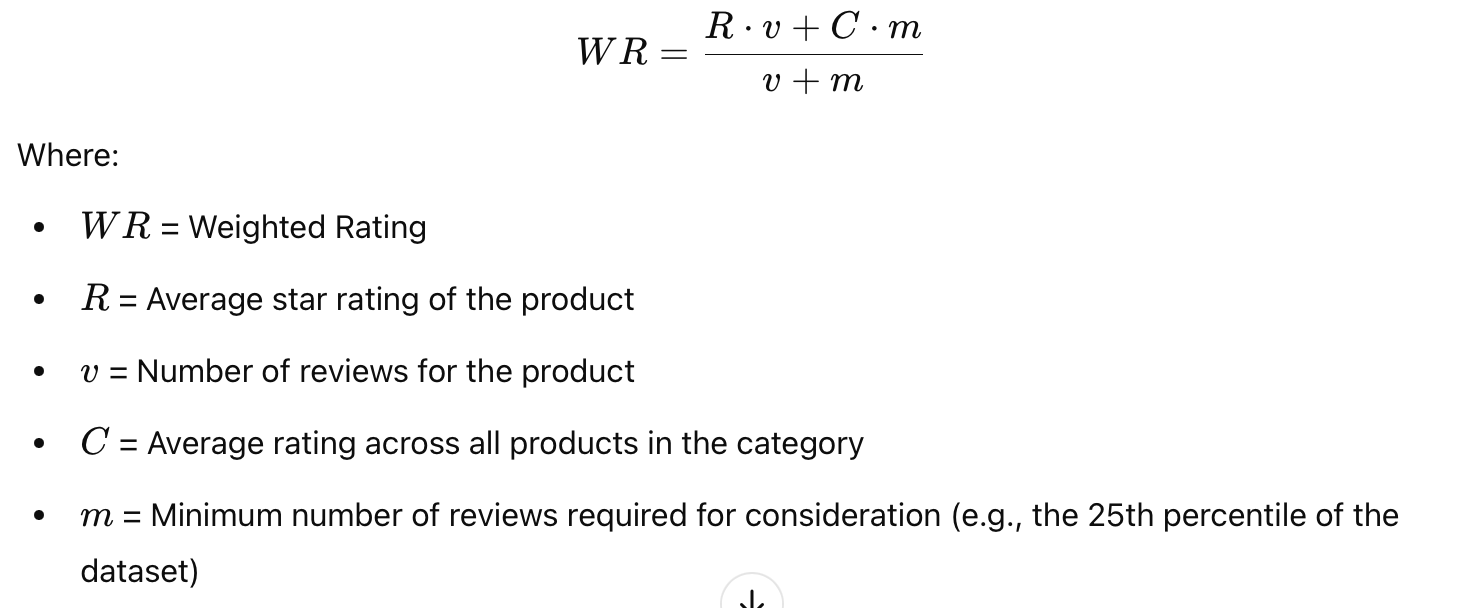

In [ ]:
import pandas as pd

# Ensure 'Stars' and 'Reviews' are numeric
face_df['Stars'] = pd.to_numeric(face_df['Stars'], errors='coerce')
face_df['Reviews'] = pd.to_numeric(face_df['Reviews'], errors='coerce')

# Drop rows with NaN values after conversion
face_df = face_df.dropna(subset=['Stars', 'Reviews'])

# Compute C (mean rating per category)
category_avg_rating = face_df.groupby('Category')['Stars'].mean()

# Define m as the 25th percentile of reviews in each category
category_min_reviews = face_df.groupby('Category')['Reviews'].quantile(0.25)


face_df = face_df.merge(category_avg_rating.rename('C'), on='Category', how='left')
face_df = face_df.merge(category_min_reviews.rename('m'), on='Category', how='left')


# Compute the weighted rating
face_df['Weighted_Rating'] = (face_df['Stars'] * face_df['Reviews'] + face_df['C'] * face_df['m']) / (face_df['Reviews'] + face_df['m'])

# Get top 5 products per category
top_5_per_category = face_df.groupby('Category').apply(lambda x: x.nlargest(5, 'Weighted_Rating')).reset_index(drop=True)

top_5_per_category = top_5_per_category.drop(columns=['C', 'm'], errors='ignore')

# Display results
top_5_per_category

<ipython-input-87-91b4f11ef886>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  face_df['Stars'] = pd.to_numeric(face_df['Stars'], errors='coerce')
<ipython-input-87-91b4f11ef886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  face_df['Reviews'] = pd.to_numeric(face_df['Reviews'], errors='coerce')
<ipython-input-87-91b4f11ef886>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be exclu

Brand  \
0                  Erborian   
1                  Erborian   
2                 Hey Honey   
3                     Tarte   
4                  Erborian   
5               DIBS Beauty   
6             Naked Sundays   
7                RMS Beauty   
8                RMS Beauty   
9               DIBS Beauty   
10                     NARS   
11                     NARS   
12               RMS Beauty   
13            Juvia's Place   
14                  Lancôme   
15              Live Tinted   
16                     NARS   
17              BOBBI BROWN   
18                 Erborian   
19              BOBBI BROWN   
20               RMS Beauty   
21                Winky Lux   
22                    Tarte   
23             Estée Lauder   
24            Laura Mercier   
25              DIBS Beauty   
26                    Tarte   
27                 Smashbox   
28              MILK MAKEUP   
29         e.l.f. Cosmetics   
30  FENTY BEAUTY by Rihanna   
31                  Lancôme   
32             jane iredale   
33              BOBBI BROWN   
34             bareMinerals   
35                 Smashbox   
36               RMS Beauty   
37        Benefit Cosmetics   
38               HALF MAGIC   
39               RMS Beauty   
40                  Lancôme   
41                   TATCHA   
42             jane iredale   
43                   TATCHA   
44         e.l.f. Cosmetics   
45        Benefit Cosmetics   
46               RMS Beauty   
47                      DHC   
48              MILK MAKEUP   
49                      MAC   
50            Naked Sundays   
51            Mario Badescu   
52        Benefit Cosmetics   
53        Benefit Cosmetics   
54             jane iredale   
55               RMS Beauty   
56               RMS Beauty   
57            Beautycounter   
58            Laura Mercier   
59                    Tarte   

                                         Product Name  Price  Stars  Reviews  \
0                                     CC Cream SPF 25  46.00    4.6     4533   
1                         Travel Size CC Cream SPF 25  25.00    4.6     4533   
2   Trick and Treat CC² Active Propolis Color Corr...  42.00    4.7     1083   
3   BB Blur Tinted Moisturizer Broad Spectrum SPF ...  42.00    4.5     3469   
4                       CC Water with Hyaluronic Acid  46.00    4.6      885   
5                                Duet Baked Blush Duo  34.00    4.9      784   
6                           Mineral Blush Serum SPF50  29.75    4.9      550   
7                      ReDimension Hydra Powder Blush  36.00    4.8     2421   
8                                           Lip2Cheek  40.00    4.8     1754   
9       GlowTour Duo Shimmering Blush + Contour Stick  38.00    4.8     1071   
10                    Laguna Bronzer Powder Talc-Free  42.00    4.8      614   
11               Mini Laguna Bronzer Powder Talc-Free  19.00    4.8      614   
12                          ReDimension Hydra Bronzer  36.00    4.8      572   
13                                        Bronzed Duo  22.00    4.8      410   
14  Teint Idole Ultra Wear Skin Transforming Powde...  45.00    4.8      390   
15                           Huestick Color Corrector  26.00    4.6     2746   
16                    Light Reflecting Eye Brightener  34.00    4.6      575   
17                   Waterproof Color Corrector Cream  33.00    4.6      534   
18  Travel Size CC Red Correct Green Color Correct...  25.00    4.6      460   
19                         Skin Color Corrector Stick  35.00    4.6      185   
20                                UnCoverup Concealer  40.00    4.8     3316   
21                 Peeper Perfect Under-Eye Concealer  18.00    4.8      742   
22                               Shape Tape Concealer  32.00    4.7    37768   
23        Double Wear Stay-in-Place 24-Hour Concealer  38.00    4.8      479   
24  Real Flawless Weightless Perfecting Serum Conc...  33.00    4.7      963   
25      GlowTour Duo Shimmering Blush + Contour St

In [ ]:
face_df = face_df.drop(columns=['C', 'm'], errors='ignore')
face_df

Brand  \
0                       Tarte   
1     FENTY BEAUTY by Rihanna   
2                       Tarte   
3                 MILK MAKEUP   
4                        Dior   
...                       ...   
1565              KIKO Milano   
1566                Hey Honey   
1567                  Lancôme   
1568            Undone Beauty   
1569             jane iredale   

                                           Product Name  Price  Stars  \
0                                  Shape Tape Concealer  32.00    4.7   
1                          Match Stix Contour Skinstick  32.00    4.2   
2                                   Sculpt Tape Contour  18.00    4.2   
3                            Sculpt Stick Cream Contour  24.00    4.7   
4                            Forever Skin Contour Stick  47.00    4.6   
...                                                 ...    ...    ...   
1565                            Full Coverage Concealer   6.75    3.3   
1566                              Trick&Treat Concealer  38.00    4.6   
1567  Effacernes Waterproof Protective Undereye Conc...  34.00    4.6   
1568          Conceal To Reveal 3-in-1 Coverage Palette  14.00    4.4   
1569                         PureMatch Liquid Concealer  30.00    4.6   

      Reviews    Category  Weighted_Rating  
0       37768  Contouring         4.699406  
1         540  Contouring         4.200924  
2         422  Contouring         4.201156  
3         323  Contouring         4.639136  
4        1732  Contouring         4.589956  
...       ...         ...              ...  
1565       13   Concealer         4.173807  
1566      270   Concealer         4.496337  
1567      946   Concealer         4.561951  
1568      296   Concealer         4.361158  
1569      258   Concealer         4.493063  

[1570 rows x 7 columns]

In [ ]:
top_5_per_category.to_csv("top_5_per_category.csv", index=False)
face_df.to_csv("face_df.csv", index=False)

#Google Trends Trending Brands

In [ ]:
it_cosmetics = face_df[face_df['Brand'].isin(['IT Cosmetics'])]
it_cosmetics = it_cosmetics.sort_values(by='Weighted_Rating', ascending=False)

In [ ]:
elf = face_df[face_df['Brand'].isin(['e.l.f. Cosmetics'])]
elf = elf.sort_values(by='Weighted_Rating', ascending=False)

In [ ]:
fenty = face_df[face_df['Brand'].isin(['FENTY BEAUTY by Rihanna'])]
fenty = fenty.sort_values(by='Weighted_Rating', ascending=False)

In [ ]:
# Get the best product for each brand
best_it_cosmetics = it_cosmetics.iloc[0]
best_elf = elf.iloc[0]
best_fenty = fenty.iloc[0]

best_products = pd.DataFrame([best_it_cosmetics, best_elf, best_fenty])
best_products

Brand                                Product Name  \
775             IT Cosmetics        Glow with Confidence Sun Cream Blush   
685         e.l.f. Cosmetics                           Camo Liquid Blush   
744  FENTY BEAUTY by Rihanna  Fenty Cheeks Suede Waterproof Powder Blush   

     Price  Stars  Reviews Category  Weighted_Rating  
775   17.0    4.7     1348    Blush         4.695290  
685    7.0    4.7     7122    Blush         4.699095  
744   28.0    4.7      601    Blush         4.689675

In [ ]:
best_products.to_csv("best_products.csv", index=False)